In [1]:
import numpy as np
# import math
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
# first let's create the start state 
state = np.zeros((7))
state[3] = 1
state

seq = state
seq

loc = np.argwhere(state)
loc = loc[0][0]
loc

sequence_array = []

In [3]:
all_array = []
np.random.seed(0)
for j in range(100):
    sequence_array = []
    i = 0
    while i < 10:
        state = np.zeros((7), dtype=np.int)
        state[3] = 1
        seq = state
        loc = np.argwhere(state)[0][0]

        while loc != 0 and loc != state.shape[0] - 1:
            if np.random.rand() <= 0.5:
                loc += -1
            else:
                loc += 1
            state = np.zeros(7)
            state[loc] = 1
            seq = np.vstack((seq, state))
        
        if seq.shape[0] < 16:
            sequence_array.append(seq)
            i += 1
#         sequence_array.append(seq)
#         i += 1
    all_array.append(sequence_array)
# print all_array[0]


In [4]:
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

In [5]:
Z = np.array([0., 1./6, 1./3, 1./2, 2./3, 5./6, 1])
lambdas = [0., 0.3, 0.8, 1.]
rms_lambdas = np.zeros((4,13))
index = -1
for lam in lambdas:
    index += 1
    rmses = []  
    for mm in np.linspace(0,0.6,13):
        
        alpha = mm
        ten_seq = all_array[1]
        last_ans = np.zeros((100, 5))
        
        # start of a training set
        for ten in range(100):
            w_0 = np.array([0, 0.5, 0.5, 0.5, 0.5, 0.5, 1])
            ten_seq = all_array[ten] 

            ten_sum = np.zeros(7)
            
            # start of a sequence
            for i in range(len(ten_seq)):
                seq = ten_seq[i]
                sum_delta_w = np.zeros(7)
                
                # start of each obs
                for t in range(len(seq)-1):
                    # calculate first part 
                    P0 = np.dot(w_0, seq[t])
                    P1 = np.dot(w_0, seq[t+1])
                    first = alpha * (P1 - P0)
                    
                    req_mat = np.array(seq[:t+1, :])
                    k_t_sum = np.zeros(7)

                    # delta W
                    for k in range(t+1):
                        up = t - k
                        lambed = lam ** up
                        req_mat[k] = req_mat[k] * lambed
                    k_t_sum = np.sum(req_mat, axis=0)
                    delta_w = first * k_t_sum

                    sum_delta_w = sum_delta_w + delta_w
                    
                w_0[1:-1] = w_0[1:-1] + sum_delta_w[1:-1]        

            ### A sequence ends over here

            last_ans[ten, :] = w_0[1:-1]
        rmsed = rmse(last_ans, Z[1:-1])
        rmses.append(rmsed)
#         print lam, alpha, rmsed
    rms_lambdas[index, :] = np.array(rmses) 
    

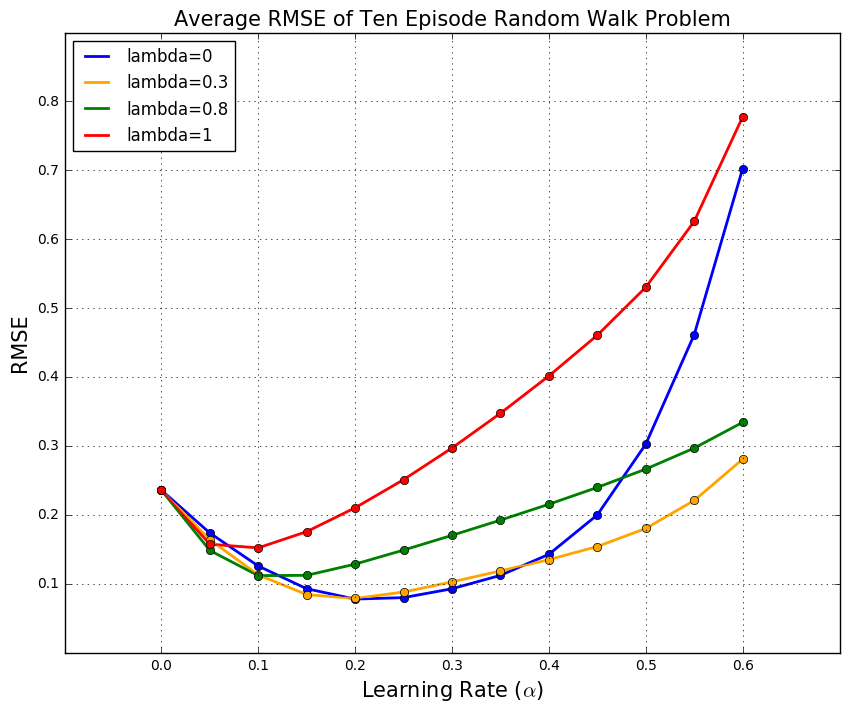

In [6]:
X = np.linspace(0, 0.6, 13)
# create a new figure of size 10 x 8 points using 100 dots per inch
plt.figure(figsize=(10,8), dpi=100)

# create a new subplot from a grid of 1x1
plt.subplot(111)

plt.plot(X, rms_lambdas[0], linewidth=2.0, label="lambda=0", color='blue')
plt.plot(X, rms_lambdas[1], linewidth=2.0, label="lambda=0.3", color='orange')
plt.plot(X, rms_lambdas[2], linewidth=2.0, label="lambda=0.8", color='green')
plt.plot(X, rms_lambdas[3], linewidth=2.0, label="lambda=1", color='red')
plt.plot(X, rms_lambdas[0], '-bo', color='blue')
plt.plot(X, rms_lambdas[1], '-bo', color='orange')
plt.plot(X, rms_lambdas[2], '-bo', color='green')
plt.plot(X, rms_lambdas[3], '-bo', color='red')

# set x limits
plt.xlim(-0.1, 0.7)

# set x ticks
plt.xticks(np.linspace(0,0.6,7))

# set y limits
plt.ylim(0, 0.9)
plt.yticks(np.linspace(0.1,0.8,8))

# set legend
plt.legend(loc='upper left')

# add grids
plt.grid()

# add title etc
plt.title('Average RMSE of Ten Episode Random Walk Problem', fontsize=15)
plt.xlabel('Learning Rate ('  + r'$\alpha$' + ')', fontsize=15)
plt.ylabel('RMSE', fontsize=15)

plt.savefig('Figure4.png', dpi=100)

